Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-223.12,-232.752,1.73314e-66
2,140.151,4.0,-220.481,-230.098,2.46213e-65
3,140.302,4.0,-217.87,-227.473,3.39959e-64
4,140.452,4.0,-215.287,-224.876,4.56226e-63
5,140.603,4.0,-212.733,-222.308,5.95073e-62
6,140.754,4.0,-210.208,-219.768,7.54395e-61
7,140.905,4.0,-207.71,-217.257,9.29533e-60
8,141.055,4.0,-205.241,-214.774,1.11319e-58
9,141.206,4.0,-202.801,-212.32,1.29572e-57


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,150.553,10.6734,-74.2822,-83.0506,0.179217
2,152.211,7.45729,-74.4641,-83.1221,0.166844
3,152.211,9.70854,-73.2208,-81.8788,0.578448
4,151.457,10.4322,-73.7135,-82.4208,0.33642
5,148.894,10.593,-75.5493,-84.435,0.0448908
6,154.02,7.53769,-73.7259,-82.2714,0.390637
7,154.925,9.46734,-72.8906,-81.3829,0.949813
8,155.98,10.6734,-73.5053,-81.9381,0.545153
9,155.075,11.3166,-73.6131,-82.0967,0.465207


### Snippet 4.23

Density of sigma

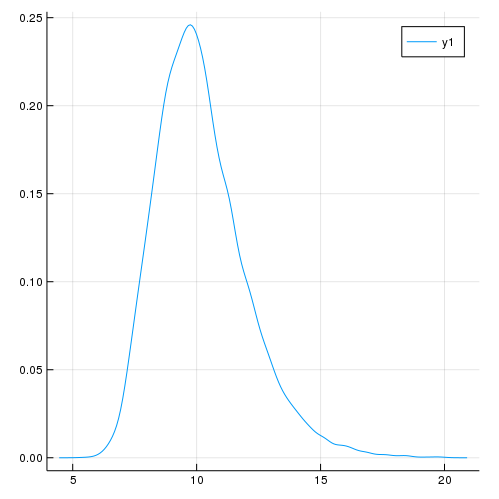

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*